In [ ]:
import requests
import bs4
import re 
import os
import pandas as pd

In [ ]:
import requests
#lấy url trang web
response = requests.get("http://quotes.toscrape.com/")
print(response)

<Response [200]>


In [ ]:
print(response.content)

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta charset="UTF-8">\n\t<title>Quotes to Scrape</title>\n    <link rel="stylesheet" href="/static/bootstrap.min.css">\n    <link rel="stylesheet" href="/static/main.css">\n</head>\n<body>\n    <div class="container">\n        <div class="row header-box">\n            <div class="col-md-8">\n                <h1>\n                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>\n                </h1>\n            </div>\n            <div class="col-md-4">\n                <p>\n                \n                    <a href="/login">Login</a>\n                \n                </p>\n            </div>\n        </div>\n    \n\n<div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">\xe2\x80\x9cThe world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.\xe2\x80\

In [ ]:
!pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.content, "html.parser")

In [ ]:
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Quotes to Scrape</title>
<link href="/static/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/main.css" rel="stylesheet"/>
</head>
<body>
<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<div class="row">
<div class="col-md-8">
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="

In [ ]:
#ghi vào file txt
content = []
kq = soup.findAll("div",attrs={'class':'container'})
for item in kq:
  #text = item.text.strip()
  #pattern = '\s+'
  #replace = ' '
  #new_kq = re.sub(pattern, replace, text)
  content.append(kq)
content = re.sub("<.*?>", "\n", str(content))  
f = open('kq.txt','w+', encoding='utf-8')
f.write('Du lieu web quotes.toscrape' + '\n')
f.write(content)
f.close()

In [ ]:
#div / class = "quote"
quote = soup.find_all("div",attrs={'class':'quote'})
result = []

#print(divs)
for item in quote: 
  s = item.text
  #xoá khoảng trắng, \n xuống dòng
  pattern = '\s+'
  replace = ' '
  new_item = re.sub(pattern, replace, s)
  result.append(new_item)

print(result)
#print(len(result))

[' “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.” by Albert Einstein (about) Tags: change deep-thoughts thinking world ', ' “It is our choices, Harry, that show what we truly are, far more than our abilities.” by J.K. Rowling (about) Tags: abilities choices ', ' “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.” by Albert Einstein (about) Tags: inspirational life live miracle miracles ', ' “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.” by Jane Austen (about) Tags: aliteracy books classic humor ', " “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.” by Marilyn Monroe (about) Tags: be-yourself inspirational ", ' “Try not to become a man of success. Rather become a man of value.” by Albert Einstein (about) Tags: adulthood su

In [ ]:
url = f'http://quotes.toscrape.com/'
r = requests.get(url)
soup = BeautifulSoup(r.content,'html.parser')

In [ ]:
result =[]
for i in range(1,5):
  r = 'http://quotes.toscrape.com/'+str('page/'+str(i)+'/')
  u = requests.get(r)
  quote = soup.find_all("div",attrs={'class':'quote'})
  for j in quote:
    quotes = j.text.strip()
    pattern = '\s+'
    replace = ' '
    new_item = re.sub(pattern, replace, quotes)
    result.append(new_item) 
print(result)
  #print(u)
print(len(result))


['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.” by Albert Einstein (about) Tags: change deep-thoughts thinking world', '“It is our choices, Harry, that show what we truly are, far more than our abilities.” by J.K. Rowling (about) Tags: abilities choices', '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.” by Albert Einstein (about) Tags: inspirational life live miracle miracles', '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.” by Jane Austen (about) Tags: aliteracy books classic humor', "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.” by Marilyn Monroe (about) Tags: be-yourself inspirational", '“Try not to become a man of success. Rather become a man of value.” by Albert Einstein (about) Tags: adulthood success value

In [ ]:
author =[]
for i in range(1,5):
  r = 'http://quotes.toscrape.com/'+str('page/'+str(i)+'/')
  u = requests.get(r)
  soup = BeautifulSoup(u.content, "html.parser")
  quote = soup.find_all("div",attrs={'class':'quote'})
  for item in quote:
    small = item.find_all("small", attrs={'class':'author'})
    for j in small:
      tag_small = j.text.strip()
      author.append(tag_small)
print(author)

['Albert Einstein', 'J.K. Rowling', 'Albert Einstein', 'Jane Austen', 'Marilyn Monroe', 'Albert Einstein', 'André Gide', 'Thomas A. Edison', 'Eleanor Roosevelt', 'Steve Martin', 'Marilyn Monroe', 'J.K. Rowling', 'Albert Einstein', 'Bob Marley', 'Dr. Seuss', 'Douglas Adams', 'Elie Wiesel', 'Friedrich Nietzsche', 'Mark Twain', 'Allen Saunders', 'Pablo Neruda', 'Ralph Waldo Emerson', 'Mother Teresa', 'Garrison Keillor', 'Jim Henson', 'Dr. Seuss', 'Albert Einstein', 'J.K. Rowling', 'Albert Einstein', 'Bob Marley', 'Dr. Seuss', 'J.K. Rowling', 'Bob Marley', 'Mother Teresa', 'J.K. Rowling', 'Charles M. Schulz', 'William Nicholson', 'Albert Einstein', 'Jorge Luis Borges', 'George Eliot']


In [ ]:
from google.colab import drive
from nltk.metrics import edit_distance
import csv

In [ ]:
def tacgiaLink():
  soup = BeautifulSoup(response.content, "html.parser")
  global author_links,date,links,result,author,re,link # đặt các biến thành global 
  global sum_detail
  author_links=[]
  date =[]
  links=[]
  result =[]
  author =[]
  link = []
  #cho vògn lặp chạy từ trang 1 -4
  for i in range(1,5):
    r = 'http://quotes.toscrape.com/'+str('page/'+str(i)+'/')
    links.append(r)
  for i in links:
    u = requests.get(i)
    soup = BeautifulSoup(u.content, "html.parser")
  #lấy quotes
    quote = soup.find_all("div",attrs={'class':'quote'})
    for j in quote:
      quotes = j.find_all('span',attrs={'class':'text'})
      for k in quotes:
        t = k.text.strip()
        result.append(t) #đưa các quotes vào list result

      # lấy tên tác giả
      small = j.find_all("small", attrs={'class':'author'})
      for i in small:
        tag_small = i.text.strip()
        author.append(tag_small) #đưa các tên tác giả vào list author
      
      #lấy link tác giả 
      span = j.find_all('span')
      for item in span:
        detail = item.find_all('a')
        for i in detail:
          link.append(i.get('href')) # đưa các link thông tin tác giả vào list link
      #lấy ngày sinh
      for item in link:      
        y = 'http://quotes.toscrape.com'+str(str(item))+'/'
        author_links.append(y) #kết hợp thành link tác giả hoàn chỉnh
      #lấy ngày sinh tác giả trong link
      for item in author_links:
        o = requests.get(item)
        soup = BeautifulSoup(o.content,'lxml')
        born = soup.find_all('span',attrs={'class':'author-born-date'})
        for i in born:
          date_born = i.text.strip()
          date.append(date_born)
  sum_detail = []
  for i,j,k,z in zip(author,date, author_links, result):
      sum_detail.append((i,j,k,z))
  return sum_detail

# !cp Quote.csv "drive/My Drive/"

In [ ]:
tacgiaLink()

[('Albert Einstein',
  'March 14, 1879',
  'http://quotes.toscrape.com/author/Albert-Einstein/',
  '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'),
 ('J.K. Rowling',
  'March 14, 1879',
  'http://quotes.toscrape.com/author/Albert-Einstein/',
  '“It is our choices, Harry, that show what we truly are, far more than our abilities.”'),
 ('Albert Einstein',
  'March 14, 1879',
  'http://quotes.toscrape.com/author/J-K-Rowling/',
  '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”'),
 ('Jane Austen',
  'July 31, 1965',
  'http://quotes.toscrape.com/author/Albert-Einstein/',
  '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”'),
 ('Marilyn Monroe',
  'March 14, 1879',
  'http://quotes.toscrape.com/author/J-K-Rowling/',
  "“Imperfection is beauty, madness is genius and it's better to be a

In [ ]:
df = pd.DataFrame(sum_detail, columns=['Name', 'Birth', 'Link', 'Quote'])
drive.mount('drive',force_remount=True) 
re = df.to_csv('Quote.csv',index=False,sep='\t')

Mounted at drive


In [ ]:
df.head(40)

,Name,Birth,Link,Quote
0,Albert Einstein,"March 14, 1879",http://quotes.toscrape.com/author/Albert-Einst...,“The world as we have created it is a process ...
1,J.K. Rowling,"March 14, 1879",http://quotes.toscrape.com/author/Albert-Einst...,"“It is our choices, Harry, that show what we t..."
2,Albert Einstein,"March 14, 1879",http://quotes.toscrape.com/author/J-K-Rowling/,“There are only two ways to live your life. On...
3,Jane Austen,"July 31, 1965",http://quotes.toscrape.com/author/Albert-Einst...,"“The person, be it gentleman or lady, who has ..."
4,Marilyn Monroe,"March 14, 1879",http://quotes.toscrape.com/author/J-K-Rowling/,"“Imperfection is beauty, madness is genius and..."
5,Albert Einstein,"March 14, 1879",http://quotes.toscrape.com/author/Albert-Einst...,“Try not to become a man of success. Rather be...
6,André Gide,"July 31, 1965",http://quotes.toscrape.com/author/Albert-Einst...,“It is better to be hated for what you are tha...
7,Thomas A. Edison,"March 14, 1879",http://quotes.toscrape.com/author/J-K-Rowling/,"“I have not failed. I've just found 10,000 way..."
8,Eleanor Roosevelt,"July 31, 1965",http://quotes.toscrape.com/author/Albert-Einst...,“A woman is like a tea bag; you never know how...
9,Steve Martin,"March 14, 1879",http://quotes.toscrape.com/author/Jane-Austen/,"“A day without sunshine is like, you know, nig..."


II - KHAI PHÁ DỮ LIỆU

In [ ]:
data = pd.read_csv('Quote.csv', skiprows = 1,header=None, sep='\t')
data.head(40)

,0,1,2,3
0,Albert Einstein,"March 14, 1879",http://quotes.toscrape.com/author/Albert-Einst...,“The world as we have created it is a process ...
1,J.K. Rowling,"March 14, 1879",http://quotes.toscrape.com/author/Albert-Einst...,"“It is our choices, Harry, that show what we t..."
2,Albert Einstein,"March 14, 1879",http://quotes.toscrape.com/author/J-K-Rowling/,“There are only two ways to live your life. On...
3,Jane Austen,"July 31, 1965",http://quotes.toscrape.com/author/Albert-Einst...,"“The person, be it gentleman or lady, who has ..."
4,Marilyn Monroe,"March 14, 1879",http://quotes.toscrape.com/author/J-K-Rowling/,"“Imperfection is beauty, madness is genius and..."
5,Albert Einstein,"March 14, 1879",http://quotes.toscrape.com/author/Albert-Einst...,“Try not to become a man of success. Rather be...
6,André Gide,"July 31, 1965",http://quotes.toscrape.com/author/Albert-Einst...,“It is better to be hated for what you are tha...
7,Thomas A. Edison,"March 14, 1879",http://quotes.toscrape.com/author/J-K-Rowling/,"“I have not failed. I've just found 10,000 way..."
8,Eleanor Roosevelt,"July 31, 1965",http://quotes.toscrape.com/author/Albert-Einst...,“A woman is like a tea bag; you never know how...
9,Steve Martin,"March 14, 1879",http://quotes.toscrape.com/author/Jane-Austen/,"“A day without sunshine is like, you know, nig..."


In [ ]:
data[['Date of birth','Year of Birth']] = data[1].str.split(',', expand=True)
data
#names = ["Year of birth"]
#data_birth = pd.DataFrame(data, columns = names)
#data_birth


,0,1,2,3,Date of birth,Year of Birth
0,Albert Einstein,"March 14, 1879",http://quotes.toscrape.com/author/Albert-Einst...,“The world as we have created it is a process ...,March 14,1879
1,J.K. Rowling,"March 14, 1879",http://quotes.toscrape.com/author/Albert-Einst...,"“It is our choices, Harry, that show what we t...",March 14,1879
2,Albert Einstein,"March 14, 1879",http://quotes.toscrape.com/author/J-K-Rowling/,“There are only two ways to live your life. On...,March 14,1879
3,Jane Austen,"July 31, 1965",http://quotes.toscrape.com/author/Albert-Einst...,"“The person, be it gentleman or lady, who has ...",July 31,1965
4,Marilyn Monroe,"March 14, 1879",http://quotes.toscrape.com/author/J-K-Rowling/,"“Imperfection is beauty, madness is genius and...",March 14,1879
5,Albert Einstein,"March 14, 1879",http://quotes.toscrape.com/author/Albert-Einst...,“Try not to become a man of success. Rather be...,March 14,1879
6,André Gide,"July 31, 1965",http://quotes.toscrape.com/author/Albert-Einst...,“It is better to be hated for what you are tha...,July 31,1965
7,Thomas A. Edison,"March 14, 1879",http://quotes.toscrape.com/author/J-K-Rowling/,"“I have not failed. I've just found 10,000 way...",March 14,1879
8,Eleanor Roosevelt,"July 31, 1965",http://quotes.toscrape.com/author/Albert-Einst...,“A woman is like a tea bag; you never know how...,July 31,1965
9,Steve Martin,"March 14, 1879",http://quotes.toscrape.com/author/Jane-Austen/,"“A day without sunshine is like, you know, nig...",March 14,1879


In [ ]:
#chuyển list year sang dạng datetime để tính tuổi
data['Year of Birth'] = pd.to_datetime(data['Year of Birth'])
data['year']= data['Year of Birth'].dt.year


In [ ]:
today = pd.to_datetime('today')
data['age'] = today.year - data['Year of Birth'].dt.year
data

,0,1,2,3,Date of birth,Year of Birth,year,age
0,Albert Einstein,"March 14, 1879",http://quotes.toscrape.com/author/Albert-Einst...,“The world as we have created it is a process ...,March 14,1879-01-01,1879,143
1,J.K. Rowling,"March 14, 1879",http://quotes.toscrape.com/author/Albert-Einst...,"“It is our choices, Harry, that show what we t...",March 14,1879-01-01,1879,143
2,Albert Einstein,"March 14, 1879",http://quotes.toscrape.com/author/J-K-Rowling/,“There are only two ways to live your life. On...,March 14,1879-01-01,1879,143
3,Jane Austen,"July 31, 1965",http://quotes.toscrape.com/author/Albert-Einst...,"“The person, be it gentleman or lady, who has ...",July 31,1965-01-01,1965,57
4,Marilyn Monroe,"March 14, 1879",http://quotes.toscrape.com/author/J-K-Rowling/,"“Imperfection is beauty, madness is genius and...",March 14,1879-01-01,1879,143
5,Albert Einstein,"March 14, 1879",http://quotes.toscrape.com/author/Albert-Einst...,“Try not to become a man of success. Rather be...,March 14,1879-01-01,1879,143
6,André Gide,"July 31, 1965",http://quotes.toscrape.com/author/Albert-Einst...,“It is better to be hated for what you are tha...,July 31,1965-01-01,1965,57
7,Thomas A. Edison,"March 14, 1879",http://quotes.toscrape.com/author/J-K-Rowling/,"“I have not failed. I've just found 10,000 way...",March 14,1879-01-01,1879,143
8,Eleanor Roosevelt,"July 31, 1965",http://quotes.toscrape.com/author/Albert-Einst...,“A woman is like a tea bag; you never know how...,July 31,1965-01-01,1965,57
9,Steve Martin,"March 14, 1879",http://quotes.toscrape.com/author/Jane-Austen/,"“A day without sunshine is like, you know, nig...",March 14,1879-01-01,1879,143


In [ ]:
#Số tác giả đóng góp trong 40 quotes đầu
seen = set()
tacgia = []
for item in data[0]:
    if item not in seen:
        seen.add(item)
        tacgia.append(item)
tacgia = pd.DataFrame(tacgia)
tacgia

,0
0,Albert Einstein
1,J.K. Rowling
2,Jane Austen
3,Marilyn Monroe
4,André Gide
5,Thomas A. Edison
6,Eleanor Roosevelt
7,Steve Martin
8,Bob Marley
9,Dr. Seuss


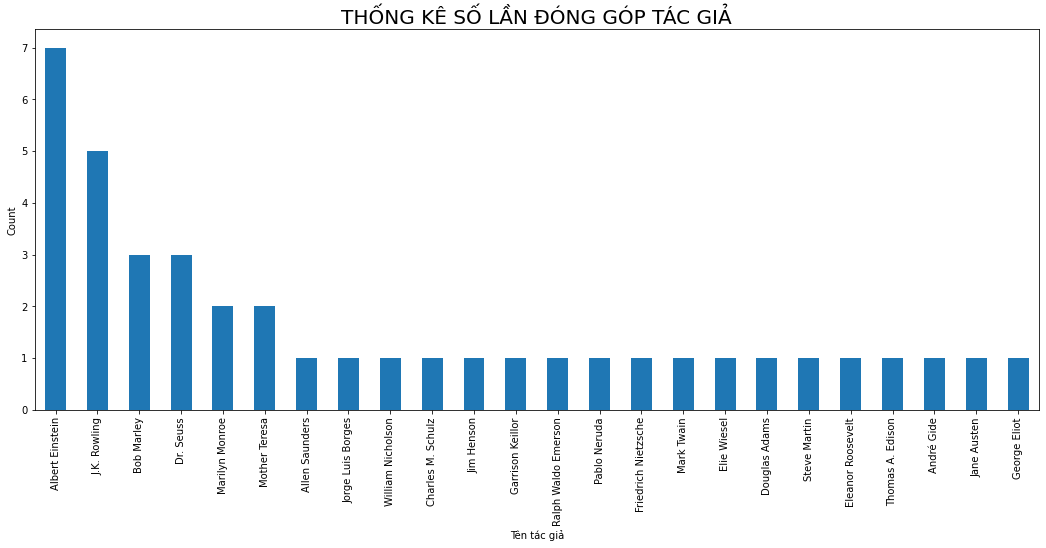

In [ ]:
#Thống kê số lần đóng góp của các tác giả trong 40 quotes
import matplotlib.pyplot as plt
import seaborn as sns

data[0].value_counts().plot.bar(figsize = (18, 7))
plt.title('THỐNG KÊ SỐ LẦN ĐÓNG GÓP TÁC GIẢ', fontsize = 20)
plt.xlabel('Tên tác giả')
plt.ylabel('Count')
plt.show()


In [ ]:
count_author = pd.DataFrame(data[0].value_counts())
count_author

,0
Albert Einstein,7
J.K. Rowling,5
Bob Marley,3
Dr. Seuss,3
Marilyn Monroe,2
Mother Teresa,2
Allen Saunders,1
Jorge Luis Borges,1
William Nicholson,1
Charles M. Schulz,1


In [ ]:
data[3].value_counts()


“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
year_birth =pd.DataFrame(data['year'].value_counts())
year_birth

,year
1879,24
1965,12
1775,3
1926,1


In [ ]:
age_data= pd.DataFrame(data['age'].value_counts())
age_data

,age
143,24
57,12
247,3
96,1


In [ ]:
longest = max(data[3])
print(longest)

“You may not be her first, her last, or her only. She loved before she may love again. But if she loves you now, what else matters? She's not perfect—you aren't either, and the two of you may never be perfect together but if she can make you laugh, cause you to think twice, and admit to being human and making mistakes, hold onto her and give her the most you can. She may not be thinking about you every second of the day, but she will give you a part of her that she knows you can break—her heart. So don't hurt her, don't change her, don't analyze and don't expect more than she can give. Smile when she makes you happy, let her know when she makes you mad, and miss her when she's not there.”


In [ ]:
#thống kê quotes có độ dài nhất 
longest = max(data[3])
print(longest)
#show toàn bộ thông tin của quotes dài nhất
data[data.isin([longest]).any(axis = 1)]


“You may not be her first, her last, or her only. She loved before she may love again. But if she loves you now, what else matters? She's not perfect—you aren't either, and the two of you may never be perfect together but if she can make you laugh, cause you to think twice, and admit to being human and making mistakes, hold onto her and give her the most you can. She may not be thinking about you every second of the day, but she will give you a part of her that she knows you can break—her heart. So don't hurt her, don't change her, don't analyze and don't expect more than she can give. Smile when she makes you happy, let her know when she makes you mad, and miss her when she's not there.”


,0,1,2,3,Date of birth,Year of Birth,year,age
13,Bob Marley,"March 14, 1879",http://quotes.toscrape.com/author/Jane-Austen/,"“You may not be her first, her last, or her on...",March 14,1879-01-01,1879,143


In [ ]:
shortest = min(data[3])
print(shortest)
#show toàn bộ thông tin của quotes dài nhất
data[data.isin([shortest]).any(axis = 1)]

“A day without sunshine is like, you know, night.”


,0,1,2,3,Date of birth,Year of Birth,year,age
9,Steve Martin,"March 14, 1879",http://quotes.toscrape.com/author/Jane-Austen/,"“A day without sunshine is like, you know, nig...",March 14,1879-01-01,1879,143


In [ ]:
from collections import Counter
print(Counter(data[3]))

Counter({'“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”': 1, '“It is our choices, Harry, that show what we truly are, far more than our abilities.”': 1, '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”': 1, '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”': 1, "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”": 1, '“Try not to become a man of success. Rather become a man of value.”': 1, '“It is better to be hated for what you are than to be loved for what you are not.”': 1, "“I have not failed. I've just found 10,000 ways that won't work.”": 1, "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”": 1, '“A day without sunshine is like, you know, night.”': 1, "“This life is what you ma

In [ ]:
data['element'] = data[3].apply(lambda x:x[1:-1].split(' '))
data['element']

0     [The, world, as, we, have, created, it, is, a,...
1     [It, is, our, choices,, Harry,, that, show, wh...
2     [There, are, only, two, ways, to, live, your, ...
3     [The, person,, be, it, gentleman, or, lady,, w...
4     [Imperfection, is, beauty,, madness, is, geniu...
5     [Try, not, to, become, a, man, of, success., R...
6     [It, is, better, to, be, hated, for, what, you...
7     [I, have, not, failed., I've, just, found, 10,...
8     [A, woman, is, like, a, tea, bag;, you, never,...
9     [A, day, without, sunshine, is, like,, you, kn...
10    [This, life, is, what, you, make, it., No, mat...
11    [It, takes, a, great, deal, of, bravery, to, s...
12    [If, you, can't, explain, it, to, a, six, year...
13    [You, may, not, be, her, first,, her, last,, o...
14    [I, like, nonsense,, it, wakes, up, the, brain...
15    [I, may, not, have, gone, where, I, intended, ...
16    [The, opposite, of, love, is, not, hate,, it's...
17    [It, is, not, a, lack, of, love,, but, a, 

In [ ]:
df= pd.DataFrame(data['element'])
file = df.to_csv('Count elements.csv',index=False,sep='\t')

In [ ]:
data_count = pd.read_csv('Count elements.csv', skiprows = 1,header=None, sep='\t')
data_count

,0
0,"['The', 'world', 'as', 'we', 'have', 'created'..."
1,"['It', 'is', 'our', 'choices,', 'Harry,', 'tha..."
2,"['There', 'are', 'only', 'two', 'ways', 'to', ..."
3,"['The', 'person,', 'be', 'it', 'gentleman', 'o..."
4,"['Imperfection', 'is', 'beauty,', 'madness', '..."
5,"['Try', 'not', 'to', 'become', 'a', 'man', 'of..."
6,"['It', 'is', 'better', 'to', 'be', 'hated', 'f..."
7,"['I', 'have', 'not', 'failed.', ""I've"", 'just'..."
8,"['A', 'woman', 'is', 'like', 'a', 'tea', 'bag;..."
9,"['A', 'day', 'without', 'sunshine', 'is', 'lik..."


In [ ]:
data['author'] = data[0]
data['quotes'] = data[3]
#data

<Figure size 1080x360 with 0 Axes>

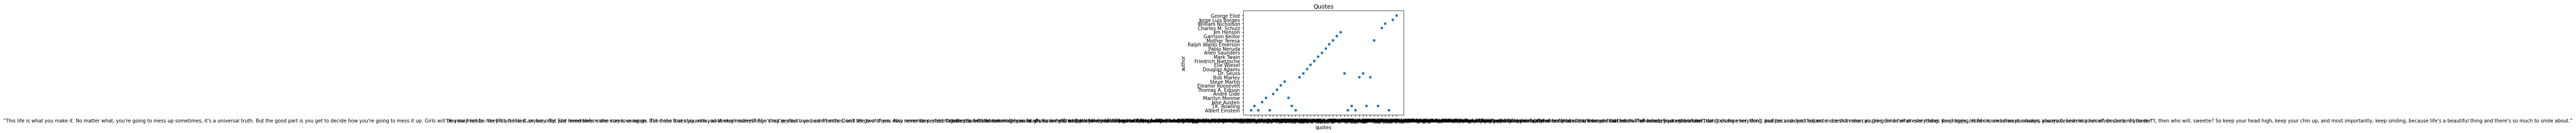

In [ ]:
#phân tích trực quan hoá giữa tác giả và quotes
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

data.plot.scatter(y='author', x='quotes', title ='Quotes')


In [ ]:
from functools import reduce # For merging aggrated data frames together
print(data.shape)

(40, 11)


In [ ]:
def minhash(input_quote, compare_quote):
    score = 0.0
    shingles = lambda s: set(s[i:i+3] for i in range(len(s)-2))
    jaccard_distance = lambda seta, setb: len(seta & setb)/float(len(seta | setb))
    try:
        score = jaccard_distance(shingles(input_quote), shingles(compare_quote))
    except ZeroDivisionError:
        print('ZeroDivisionError')

    return score

In [ ]:
#so sánh giữa 2 câu nói của Albert Einstein
print(minhash("The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.","There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle."))

0.11949685534591195


In [ ]:
##so sánh giữa 2 câu nói của Albert Einstein
print(minhash("Try not to become a man of success. Rather become a man of value.","There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle."))


0.08


In [ ]:
#so sánh giữa 2 câu nói của Albert Einstein và J.K. Rowling
print(minhash("Try not to become a man of success. Rather become a man of value.","It is our choices, Harry, that show what we truly are, far more than our abilities."))

0.025423728813559324


In [ ]:
#so sánh giữa 2 câu nói của Albert Einstein và Thomas A. Edison

print(minhash("Try not to become a man of success. Rather become a man of value.","It is better to be hated for what you are than to be loved for what you are not."))

0.08602150537634409
